In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Задача 1

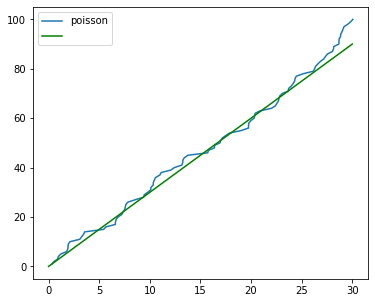

In [47]:
n = 100
sample = sc.expon.rvs(scale = 1/3, size = n)
arrival_times = []
for i in range(n):
    if i == 0:
        arrival_times.append(sample[i])
    else:
        arrival_times.append(sample[i]+arrival_times[i-1])
plt.figure(figsize = (6,5))
plt.plot(arrival_times, range(1,n+1), label = 'poisson')
a = [ i for i in range(int(max(arrival_times))+1)]
b = [ 3*i for i in range(int(max(arrival_times))+1)]
plt.plot(a,b,color = 'green',label = ' ')
plt.legend()
plt.show()

In [48]:
s = [arrival_times[i+1] - arrival_times[i] if i > 0 else arrival_times[i]  for i in range(len(arrival_times) -1)]
1 / np.mean(s)

3.314684076371986

### Задание 2

In [15]:
n = 100
lamb = 3

In [16]:
def f_pose(a,b,n):
    for i in range(n):
        if a < b[i]:
            if i == 0:
                return b[i] - a, a
            if i != 0:
                return b[i] - a, a - b[i-1]

Среднeе время до следующего автобуса:  0.2677152696613714 После прошлого:0.3898170539861414


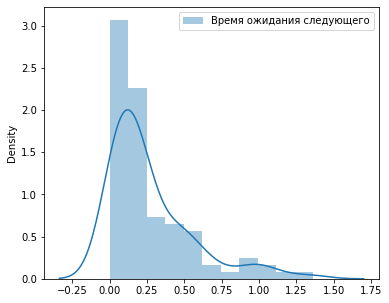

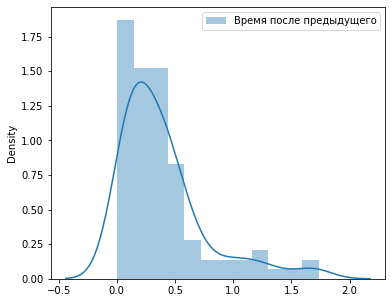

In [30]:
time = sc.uniform.rvs(size = n)
wait = []
prev = []
for j in range(n):
    sample = sc.expon.rvs(scale = 1/lamb, size = n)
    a_t = []
    for i in range(n):
        if i == 0:
            a_t.append(sample[i])
        else:
            a_t.append(sample[i] + a_t[i - 1])
    w1, w2 = found_pose(time[j] * max(a_t), a_t, n)
    wait.append(w1)
    prev.append(w2)
print('Среднeе время до следующего автобуса:  ' + str(np.mean(wait)) + ' После прошлого:' + str(np.mean(prev)))
plt.figure(figsize=(6, 5))
sb.distplot(wait, label = 'Время ожидания следующего')
plt.legend()
plt.show()
plt.figure(figsize=(6, 5))
sb.distplot(prev, label = 'Время после предыдущего')
plt.legend()
plt.show()

Среднeе время до следующего автобуса:  0.2790569076553133 После прошлого:0.38368530232866305


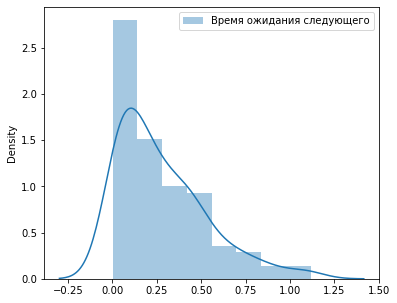

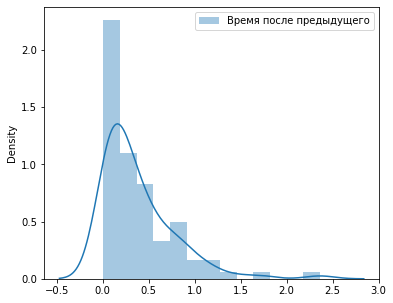

In [33]:
time = sc.uniform.rvs(size = 1)
wait = []
prev = []
for j in range(n):
    sample = sc.expon.rvs(scale = 1/lamb, size = n)
    a_t = []
    for i in range(n):
        if i == 0:
            a_t.append(sample[i])
        else:
            a_t.append(sample[i] + a_t[i - 1])
    w1, w2 = found_pose(time * max(a_t), a_t, n)
    wait.append(w1)
    prev.append(w2)
print('Среднeе время до следующего автобуса:  ' + str(np.mean(wait)) + ' После прошлого:' + str(np.mean(prev)))
plt.figure(figsize=(6, 5))
sb.distplot(wait, label = 'Время ожидания следующего')
plt.legend()
plt.show()
plt.figure(figsize=(6, 5))
sb.distplot(prev, label = 'Время после предыдущего')
plt.legend()
plt.show()